In [27]:
import numpy as np
import pandas as pd
from scipy.stats import iqr
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=18,9
import seaborn as sb
from datetime import datetime

In [28]:
ds=pd.read_csv('./Monthly_data_cmo.csv')

In [29]:
print(ds.head())
ds.shape

         APMC      Commodity  Year  Month  arrivals_in_qtl  min_price  \
0  Ahmednagar          Bajri  2015  April               79       1406   
1  Ahmednagar          Bajri  2016  April              106       1788   
2  Ahmednagar  Wheat(Husked)  2015  April             1253       1572   
3  Ahmednagar  Wheat(Husked)  2016  April              387       1750   
4  Ahmednagar  Sorgum(Jawar)  2015  April             3825       1600   

   max_price  modal_price     date district_name   state_name  
0       1538         1463  2015-04    Ahmadnagar  Maharashtra  
1       1925         1875  2016-04    Ahmadnagar  Maharashtra  
2       1890         1731  2015-04    Ahmadnagar  Maharashtra  
3       2220         1999  2016-04    Ahmadnagar  Maharashtra  
4       2200         1900  2015-04    Ahmadnagar  Maharashtra  


(62429, 11)

In [30]:
ds.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [31]:
ds.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

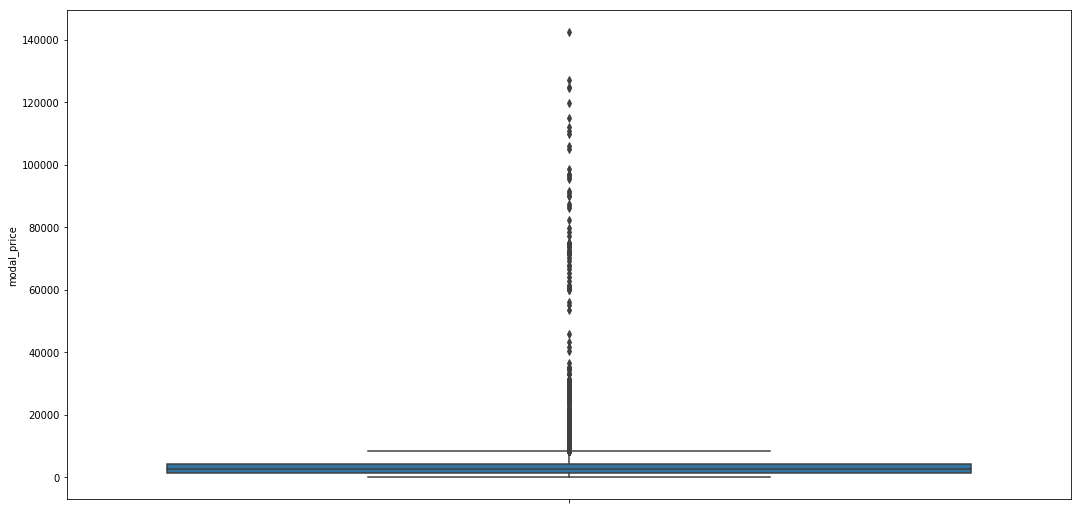

In [32]:
plot1 = sb.boxplot(y="modal_price", data=ds, whis=1.5)

In [33]:
Qual1 = ds.modal_price.quantile(0.25)
Qual3 = ds.modal_price.quantile(0.75)
IQR = Qual3 - Qual1
print(IQR)

2807.0


In [34]:
ds.loc[ds['modal_price'] < (Qual1 - 1.5 * IQR), 'modal_price']
ds.loc[~(ds['modal_price'] > (Qual3 + 1.5 * IQR)), 'modal_price']

0        1463
1        1875
2        1731
3        1999
4        1900
5        2119
6        1373
7        1375
8        3647
9        5216
10       7150
11       7500
12       5233
13       7329
14       5700
15       7500
16       3313
17       3150
18       3603
19       3263
20       5500
21       2500
22       1133
23       3000
24       2138
25       1250
26       5750
27       5250
28       2833
29       1500
         ... 
62399    1994
62400    1771
62401    1400
62402    7949
62403    5800
62404    6419
62405    1041
62406     451
62407    1272
62408    1707
62409    2314
62410    1161
62411    2529
62412    1244
62413    2009
62414    2387
62415    1313
62416    6761
62417    6275
62418    4300
62419    2650
62420    1400
62421    1800
62422    1967
62423    1267
62424    6200
62425    5000
62426    6400
62427    2633
62428    3067
Name: modal_price, Length: 59896, dtype: int64

In [35]:

ds['date'] = pd.to_datetime(ds['date'])
ds.index = ds['date']

#The data is not sorted by date and also the date is repetitive for each commodity for each apmc
ds.sort_values(by='date', inplace=True)
ds.head()

c:\users\pranjali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
date,,,,,,,,,,,
2014-09-01,Kurdwadi,Sorgum(Jawar),2014,September,454,1353,2610,1981,2014-09-01,Solapur,Maharashtra
2014-09-01,Satara,Ladies Finger,2014,September,128,2435,3261,2848,2014-09-01,Satara,Maharashtra
2014-09-01,Satara,Potato,2014,September,2988,2175,2488,2331,2014-09-01,Satara,Maharashtra
2014-09-01,Satara,Ginger (Fresh),2014,September,199,3438,4813,4125,2014-09-01,Satara,Maharashtra
2014-09-01,Satara,Ground Nut Pods (Dry),2014,September,1,3000,4000,3500,2014-09-01,Satara,Maharashtra
